In [1]:
from PIL import Image
from libtiff import TIFF
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import os
import torch
import torchvision.transforms as transforms

from ImagenetDataset import get_zipped_dataloaders, FULL_SET_PATH
from utils import getLabelToClassMapping

%matplotlib inline

In [2]:
img_data_path = os.path.join(os.getcwd(), 'plastic_data', 'blackvalue_aufnahmen_14.11.2017')

print(img_data_path)
file_list = [x for x in os.listdir(img_data_path) if x != 'Thumbs.db']
print(len(file_list))

rgb_files_list = [x for x in file_list if "_A.tif" in x]
bin_files_list = [x for x in file_list if "_A_alpha" in x]
spec_files_list = [x for x in file_list if "_B.tif" in x]
print(len(rgb_files_list))
print(len(bin_files_list))
print(len(spec_files_list))

rgb_files_list.sort()
bin_files_list.sort()
spec_files_list.sort()
print(rgb_files_list[0:3])
print(bin_files_list[0:3])
print(spec_files_list[0:3])

data_rec_files = list(zip(rgb_files_list, bin_files_list, spec_files_list))
print(len(data_rec_files))
print(data_rec_files[0])

/home/alex/Projects/Studium/anytimeDnn/data/plastic_data/blackvalue_aufnahmen_14.11.2017
246
82
82
82
['abs1_0000_A.tif', 'abs1_0001_A.tif', 'abs1_0002_A.tif']
['abs1_0000_A_alpha.tif', 'abs1_0001_A_alpha.tif', 'abs1_0002_A_alpha.tif']
['abs1_0000_B.tif', 'abs1_0001_B.tif', 'abs1_0002_B.tif']
82
('abs1_0000_A.tif', 'abs1_0000_A_alpha.tif', 'abs1_0000_B.tif')


In [14]:
# create data_loader
train_loader, val_loader, test_loader = get_zipped_dataloaders('./imagenet_full', batch_size=1)
#_, _, test_loader = get_zipped_dataloaders('./imagenet_red', batch_size=1)

train_loader, val_loader, test_loader = get_zipped_dataloaders('./imagenet_red', batch_size=1)

label_class_map = getLabelToClassMapping('./imagenet_full')
#print(len(train_loader) + len(val_loader))
#print(len(label_class_map))

./imagenet_full/index-train.txt
./imagenet_full/index-val.txt
./imagenet_red/index-train.txt
./imagenet_red/index-val.txt
./imagenet_full/index-val.txt


In [15]:
class_count_map = dict()

per_class_val = dict()
per_class_train = dict()
per_class_test = dict()

# init class count
for entry in label_class_map:
    class_count_map[entry] = 0
    per_class_test[entry] = 0
    per_class_train[entry] = 0
    per_class_val[entry] = 0


for _, target in iter(train_loader):
    #class_count_map[label_class_map[target.item()]] += 1
    per_class_train[label_class_map[target.item()]] += 1

for _, target in iter(val_loader):
    #class_count_map[label_class_map[target.item()]] += 1
    per_class_val[label_class_map[target.item()]] += 1

for _, target in iter(test_loader):
    per_class_test[label_class_map[target.item()]] += 1


In [17]:
# calculate dataframe for images per classes
import pandas as pd 
print(len(class_count_map.keys()))

df = pd.DataFrame.from_dict(class_count_map, orient='index')
#df = df.sort_values(0)

df_train = pd.DataFrame.from_dict(per_class_train, orient='index').sort_values(0)
df_val = pd.DataFrame.from_dict(per_class_val, orient='index').sort_values(0)
df_test = pd.DataFrame.from_dict(per_class_test, orient='index').sort_values(0)

40


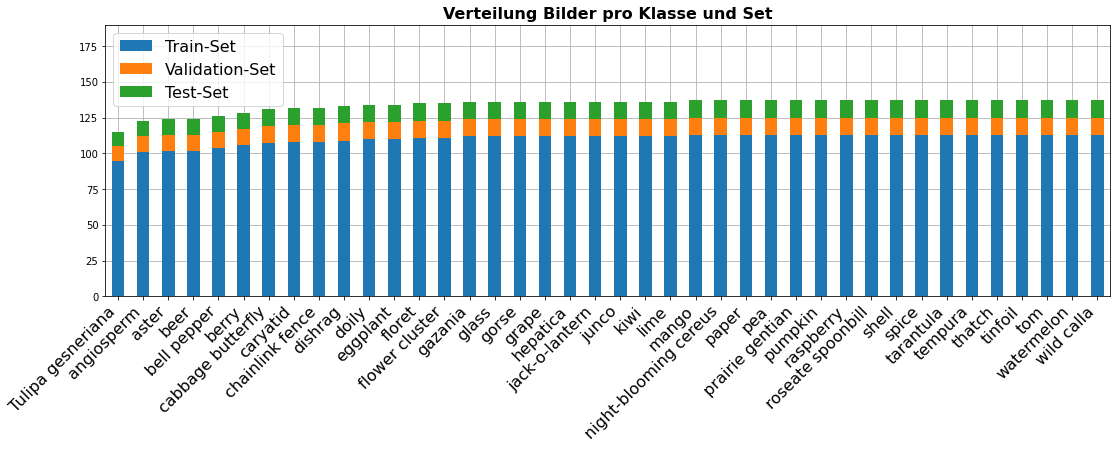

In [47]:
# plot Images per Classes

def plotDf(df):
    #axes = df.plot.bar(subplots=True, figsize=(18, 5), rot=45, zorder=4)
    axes = df.plot.bar(stacked=True, figsize=(18, 5), rot=45, zorder=4)
    #ax = axes[0]
    ax = axes
    ax.grid(zorder=0)
    ax.set_title('Verteilung Bilder pro Klasse und Set', fontsize=16, fontweight='bold')
    ax.set_xticklabels(class_count_map.keys(), rotation=45, ha='right')
    ax.tick_params(axis='x', labelsize=16)
    ax.set_ylim((0, 190))
    ax.legend(loc=2, prop={'size': 16})
    #ax.get_legend().remove()

df = pd.concat([df_train, df_val, df_test], axis=1, ignore_index=True)
df = df.rename(columns={0:'Train-Set', 1:'Validation-Set', 2: 'Test-Set'})
#df.head()
plotDf(df)


In [98]:
# Plot the test_set values
class_count_map = dict()
label_class_map = getLabelToClassMapping('./imagenet_red')
# init class count
for entry in label_class_map:
    class_count_map[entry] = 0

for _, target in iter(test_loader):
    class_count_map[label_class_map[target.item()]] += 1

for key in class_count_map:
    print(f'{key}: {class_count_map[key]}')

./imagenet_red/index-val.txt
Tulipa gesneriana: 12
angiosperm: 12
aster: 12
beer: 12
bell pepper: 11
berry: 12
cabbage butterfly: 12
caryatid: 12
chainlink fence: 12
dishrag: 12
doily: 12
eggplant: 11
floret: 12
flower cluster: 12
gazania: 10
glass: 12
gorse: 12
grape: 12
hepatica: 12
jack-o-lantern: 12
junco: 12
kiwi: 12
lime: 12
mango: 11
night-blooming cereus: 12
paper: 12
pea: 11
prairie gentian: 12
pumpkin: 12
raspberry: 12
roseate spoonbill: 12
shell: 12
spice: 12
tarantula: 12
tempura: 12
thatch: 12
tinfoil: 11
tom: 12
watermelon: 12
wild calla: 12


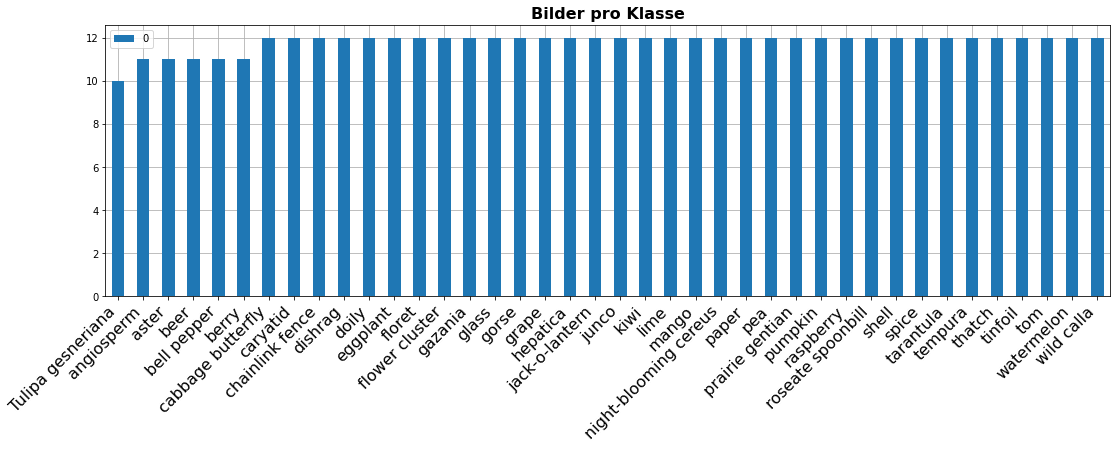

In [100]:
df = pd.DataFrame.from_dict(class_count_map, orient='index')
df = df.sort_values(0)
plotDf(df)